In [29]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
# Convert Sales column to numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')  # converts non-numeric to NaN

# Classification label
df['SalesClass'] = ['High' if x > 15 else 'Low' for x in df['sales']]

# Features
X = df[['TV', 'radio', 'newspaper']]
y = df['SalesClass']


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 125)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

predicted = model.predict([X_test.iloc[2]])
print(f"Actual Value: {y_test.iloc[2]}")
print(f"Predicted Value: {predicted[0]}")


Actual Value: High
Predicted Value: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
    )

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.8636363636363636
F1 Score: 0.8656310023851237


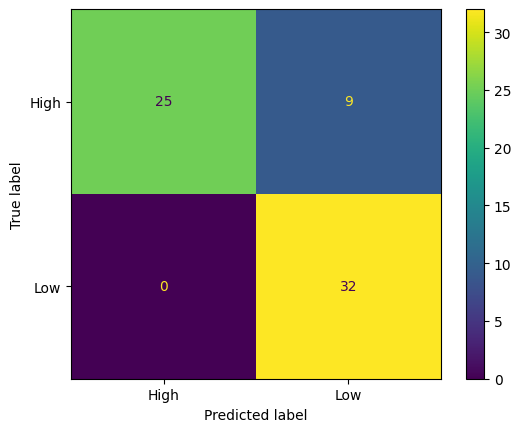

In [35]:
labels = ["High", "Low"]
cm = confusion_matrix(y_test, y_pred, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()